## Project: Identify Cluster Analysis:

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import preprocessing from sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from scipy.stats import boxcox
import spherecluster
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 1) Load the Data:

In [49]:
df = pd.read_csv('CollegeScorecard.csv')

**Reading Summary of DataSet Features**

In [50]:
df_summary = pd.read_csv('CollegeScorecardDataDictionary-09-12-2015.csv',sep=',')
df_summary.head()

,NAME OF DATA ELEMENT,Year,dev-category,developer-friendly name,VARIABLE NAME,API data type,label,VALUE,LABEL,SCORECARD? Y/N,SOURCE,NOTES
0,Unit ID for institution,NaN,root,id,UNITID,integer,NaN,NaN,NaN,NaN,IPEDS,NaN
1,8-digit OPE ID for institution,NaN,root,ope8_id,OPEID,integer,NaN,NaN,NaN,NaN,IPEDS,NaN
2,6-digit OPE ID for institution,NaN,root,ope6_id,opeid6,integer,NaN,NaN,NaN,NaN,IPEDS,NaN
3,Institution name,2013,school,name,INSTNM,string,NaN,NaN,NaN,Y,IPEDS,NaN
4,City,2013,school,city,CITY,string,NaN,NaN,NaN,Y,IPEDS,NaN


**How many Rows and Columns are there in the DataSets?**

In [51]:
# Check the structure of the data.
print("Dataset has {} samples with {} features each.".format(*df.shape))

Dataset has 7804 samples with 1725 features each.


In [52]:
df.head()

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.892045455,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.482490272,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.334633385


**Viewing Summary of DataSet**

In [53]:
df.describe()

,UNITID,OPEID,opeid6,sch_deg,HCM2,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,...,pct25_earn_wne_p8,pct75_earn_wne_p8,pct90_earn_wne_p8,sd_earn_wne_p8,gt_25k_p8,count_nwne_p9,count_wne_p9,mn_earn_wne_p9,sd_earn_wne_p9,gt_25k_p9
count,7.804000e+03,7.804000e+03,7804.000000,0.0,7804.000000,7804.000000,7804.000000,7804.000000,7804.00000,7804.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.705430e+06,2.032428e+06,16121.271271,NaN,0.008842,0.731548,8.334956,1.788954,2.17632,2.216427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,6.789848e+06,4.281088e+06,13663.764753,NaN,0.093619,0.443182,24.068238,1.034792,1.31764,0.837223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.006540e+05,1.002000e+05,1002.000000,NaN,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.743918e+05,3.455750e+05,3439.750000,NaN,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.306000e+05,1.063100e+06,10490.000000,NaN,0.000000,1.000000,1.000000,2.000000,2.00000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.462262e+05,2.616779e+06,25785.000000,NaN,0.000000,1.000000,3.000000,3.000000,4.00000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.828571e+07,8.209882e+07,42264.000000,NaN,1.000000,1.000000,141.000000,4.000000,4.00000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**We can see there are many missing Values features in the dataset**

## 2) Preprocessing:

### Exploring Na Values in Rows & Columns

**Perform an assessment of how much missing data there is in each column of the dataset.**

In [54]:
df_null = df.isna().sum(axis=0)
df_null[df_null>0].sort_values(inplace=True)

(array([ 329.,  101.,   16.,    9.,   13.,    8.,   10.,   27.,   31.,
        1181.]),
 array([   0. ,  780.4, 1560.8, 2341.2, 3121.6, 3902. , 4682.4, 5462.8,
        6243.2, 7023.6, 7804. ]),
 <a list of 10 Patch objects>)

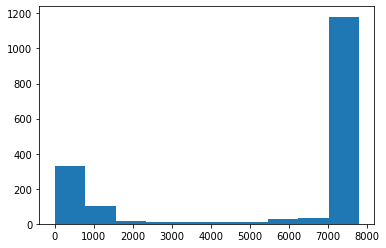

In [55]:
# Investigate amount of missing data in each column.
na_count=pd.DataFrame(df.shape[0] - df.count())
na_count.columns=['na_count']
plt.hist(na_count['na_count'])

**Remove the outlier columns from the dataset.From the histogram above, we observe to delete columnns with NAs more than 1000**

In [56]:
na_count = na_count[na_count['na_count']>1000]
df.drop(na_count.index ,axis=1,inplace=True)

**Investigate patterns in the amount of missing data in each rows.**

(array([6473.,  654.,  108.,   77.,   71.,    0.,    0.,  401.,    9.,
          11.]),
 array([  0. ,  35.5,  71. , 106.5, 142. , 177.5, 213. , 248.5, 284. ,
        319.5, 355. ]),
 <a list of 10 Patch objects>)

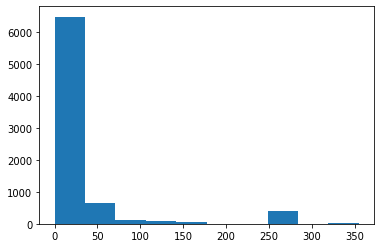

In [57]:
na_count=pd.DataFrame(df.isnull().sum(axis=1))
na_count.columns=['na_count']
plt.hist(na_count['na_count'])

**Remove the outlier Rows from the dataset.From the histogram above, we are better delete Rows with NAs in more than 50 Columns**

In [58]:
na_count = na_count[na_count['na_count']>50]
df.drop(na_count.index ,axis=0,inplace=True)

**How many data types are there of each data type?**

In [59]:
df.dtypes.value_counts()

float64    258
object     103
int64       12
dtype: int64

**Viewing Object Data Type Features**

In [60]:
df.dtypes.loc[df.dtypes=='object']

INSTNM                         object
CITY                           object
STABBR                         object
ZIP                            object
INSTURL                        object
                                ...  
NOPELL_RPY_3YR_RT_SUPP         object
FEMALE_RPY_3YR_RT_SUPP         object
MALE_RPY_3YR_RT_SUPP           object
FIRSTGEN_RPY_3YR_RT_SUPP       object
NOTFIRSTGEN_RPY_3YR_RT_SUPP    object
Length: 103, dtype: object

**Viewing Integer Data Type Features**

In [61]:
df.dtypes.loc[df.dtypes=='int64']

UNITID       int64
OPEID        int64
opeid6       int64
HCM2         int64
main         int64
NUMBRANCH    int64
PREDDEG      int64
HIGHDEG      int64
CONTROL      int64
st_fips      int64
region       int64
CURROPER     int64
dtype: object

**Viewing float Data Type Features**

In [62]:
df.dtypes.loc[df.dtypes=='float64']

LOCALE       float64
LATITUDE     float64
LONGITUDE    float64
HBCU         float64
PBI          float64
              ...   
INEXPFTE     float64
PCTPELL      float64
PCTFLOAN     float64
UG25abv      float64
CDR3         float64
Length: 258, dtype: object

### Drop Irrelevant Features

In [63]:
df.drop(['UNITID','OPEID','opeid6','INSTNM','CITY','STABBR','ZIP','INSTURL','NPCURL','NUMBRANCH','region'],axis=1,inplace=True)

# Viewing MultiCollinearity Among Features

In [64]:
corr = df.corr()

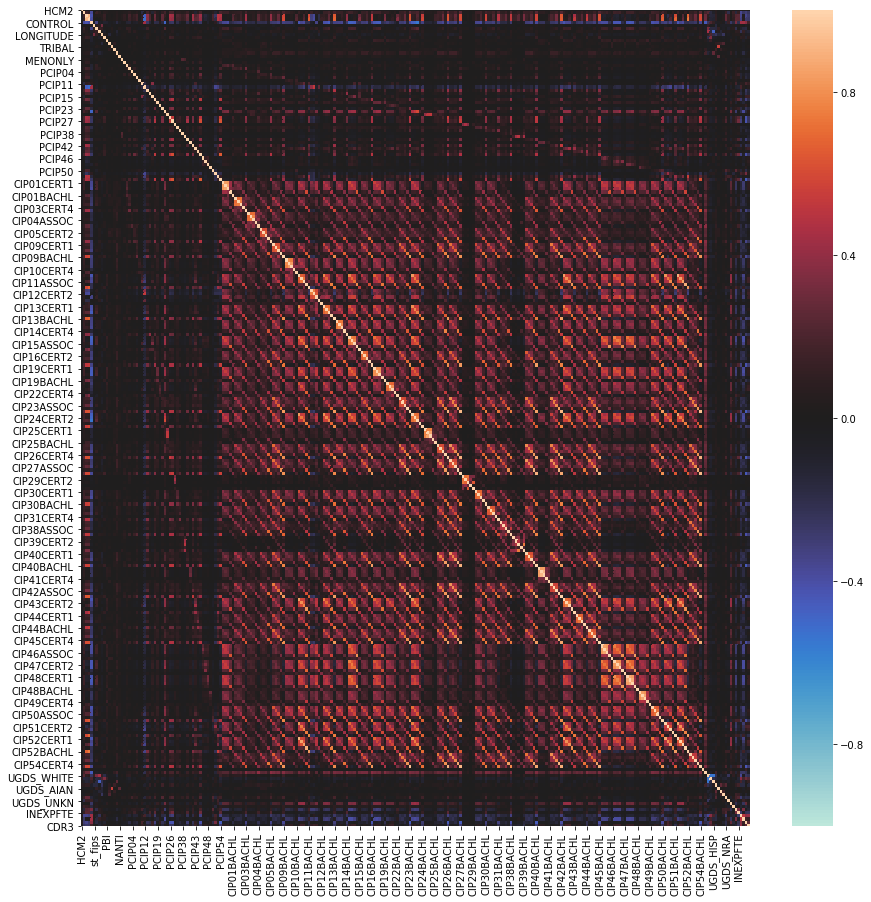

In [65]:
fig, axes = plt.subplots(figsize=(15, 15))
graph = sns.heatmap(corr, vmin=-1, vmax=1, center=0, ax=axes)
plt.show()

**Dropping Columns having greater than 60% MultiCollinearity**

In [66]:
count =0
drop = list()
for i in range(0, corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if(abs(corr.iloc[i, j]) > 0.6):
            drop.append(corr.columns[i])
            count += 1
            
ls = list(set(drop))  
df.drop(ls, axis=1, inplace=True)
print('Total Feature having Correlation > 60% is {} columns which has been droped.' .format(len(ls)))

Total Feature having Correlation > 60% is 149 columns which has been droped.


In [67]:
df.shape

(6595, 213)

##  3) Missing Value Imputation:

**For  numeric variables having NAs, we used mean to replace the NAs**

In [68]:
for column in df.columns:
    if df.dtypes[column] == np.int64 or  df.dtypes[column] == np.float64:       
         df[column] = df[column].fillna(df[column].mean())   

**For categorical variables  having NA in their values , we used most frequent item to replace the NAs**

In [69]:
for column in df.columns:
    if df.dtypes[column] == np.object:       
        df[column] = df[column].fillna(df[column].mode()[0])

**Now Check No Column have any Null Value Present in the dataset ghaving cleaned.**

In [70]:
df.isnull().sum()

HCM2                           0
main                           0
CONTROL                        0
st_fips                        0
LOCALE                         0
                              ..
NOPELL_RPY_3YR_RT_SUPP         0
FEMALE_RPY_3YR_RT_SUPP         0
MALE_RPY_3YR_RT_SUPP           0
FIRSTGEN_RPY_3YR_RT_SUPP       0
NOTFIRSTGEN_RPY_3YR_RT_SUPP    0
Length: 213, dtype: int64

**Now No Missing Value present in our Dataset**

## 4) Features Transformation

**Now  we will  Encode  Categorical Features into Numeric by Label Encoding to give it to our Model.Which understand Integers.**

In [71]:
categorical_feature_mask = df.dtypes==object
categorical_cols = df.columns[categorical_feature_mask].tolist()
categorical_cols

['RPY_3YR_RT',
 'INC_PCT_LO',
 'DEP_STAT_PCT_IND',
 'DEP_INC_PCT_LO',
 'IND_INC_PCT_LO',
 'PAR_ED_PCT_1STGEN',
 'INC_PCT_M1',
 'INC_PCT_M2',
 'INC_PCT_H1',
 'INC_PCT_H2',
 'DEP_INC_PCT_M1',
 'DEP_INC_PCT_M2',
 'DEP_INC_PCT_H1',
 'DEP_INC_PCT_H2',
 'IND_INC_PCT_M1',
 'IND_INC_PCT_M2',
 'IND_INC_PCT_H1',
 'IND_INC_PCT_H2',
 'PAR_ED_PCT_MS',
 'PAR_ED_PCT_HS',
 'PAR_ED_PCT_PS',
 'APPL_SCH_PCT_GE2',
 'APPL_SCH_PCT_GE3',
 'APPL_SCH_PCT_GE4',
 'APPL_SCH_PCT_GE5',
 'DEP_INC_AVG',
 'IND_INC_AVG',
 'DEBT_MDN',
 'GRAD_DEBT_MDN',
 'WDRAW_DEBT_MDN',
 'LO_INC_DEBT_MDN',
 'MD_INC_DEBT_MDN',
 'DEP_DEBT_MDN',
 'IND_DEBT_MDN',
 'PELL_DEBT_MDN',
 'NOPELL_DEBT_MDN',
 'FEMALE_DEBT_MDN',
 'MALE_DEBT_MDN',
 'FIRSTGEN_DEBT_MDN',
 'NOTFIRSTGEN_DEBT_MDN',
 'DEBT_N',
 'GRAD_DEBT_N',
 'WDRAW_DEBT_N',
 'LO_INC_DEBT_N',
 'MD_INC_DEBT_N',
 'HI_INC_DEBT_N',
 'DEP_DEBT_N',
 'IND_DEBT_N',
 'PELL_DEBT_N',
 'NOPELL_DEBT_N',
 'FEMALE_DEBT_N',
 'MALE_DEBT_N',
 'FIRSTGEN_DEBT_N',
 'NOTFIRSTGEN_DEBT_N',
 'GRAD_DEBT_MDN10YR',

**Label Encoding of Categorical Columns**

In [72]:
le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [73]:
df.head()

,HCM2,main,CONTROL,st_fips,LOCALE,LATITUDE,LONGITUDE,HBCU,PBI,ANNHI,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,0,1,1,1,12.0,34.7834,-86.5685,1.0,0.0,0.0,...,670,654,405,851,870,115,759,475,494,444
1,0,1,1,1,12.0,33.5022,-86.8092,0.0,0.0,0.0,...,1944,2015,1811,2377,2496,1368,2258,1847,2063,1898
2,0,1,2,1,12.0,32.3626,-86.1740,0.0,0.0,0.0,...,1679,1690,3184,1850,1764,1241,1379,1555,1437,1313
3,0,1,1,1,12.0,34.7228,-86.6384,0.0,0.0,0.0,...,2269,2060,1992,2487,2528,1762,2306,2059,2212,2045
4,0,1,1,1,12.0,32.3643,-86.2957,1.0,0.0,0.0,...,410,459,164,384,337,52,327,204,212,208


## Feature Scaling & Dimensionality Reduction (Principal Component Analysis)

In [74]:
def do_pca(num_components,data):   
    X = StandardScaler().fit_transform(data)
    pca = PCA(num_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

**I want to kept at least 80% of the variability in the dataset**

## 6) Perform Dimensionality Reduction:

In [75]:
# We are providing only 90 numbers To make  Prinicpal Component
pca, X_pca = do_pca(90,df)
X_pca.shape

(6595, 90)

In [76]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

### Demonstrate Variance of PCA's Using Scree Plot

Percentage of Variance Defined by First 90 Components are:0.8


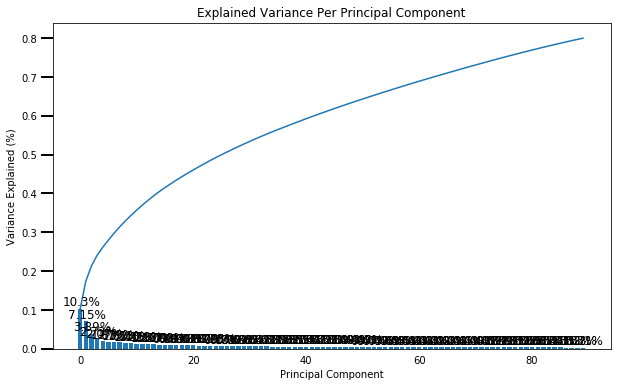

In [77]:
scree_plot(pca)
print("Percentage of Variance Defined by First 90 Components are:" + str(round(pca.explained_variance_ratio_.sum(),2)))

In [78]:
def pca_results(full_dataset, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['PCA {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions
    
	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

**Column Wise Share of Variance in Every Principal Component**

In [79]:
Components = pca_results(df, pca)
Components.T

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,...,PCA 81,PCA 82,PCA 83,PCA 84,PCA 85,PCA 86,PCA 87,PCA 88,PCA 89,PCA 90
Explained Variance,0.1031,0.0715,0.0389,0.0273,0.0208,0.0183,0.0179,0.0163,0.0153,0.0141,...,0.0036,0.0036,0.0036,0.0035,0.0035,0.0034,0.0033,0.0033,0.0032,0.0032
HCM2,0.0077,-0.0261,0.0014,0.0294,0.0030,0.0266,0.0268,0.0019,0.0122,0.0202,...,0.0123,0.0610,-0.0398,-0.0165,-0.0290,0.1628,-0.0012,0.0255,0.0768,-0.0598
main,0.1165,-0.0189,0.0980,-0.0516,-0.0184,-0.0938,0.0708,-0.0149,0.0382,-0.0238,...,0.0326,-0.0185,0.0489,0.0462,0.0777,0.0537,-0.0250,0.0048,-0.0876,0.0247
CONTROL,-0.0795,-0.1080,-0.1768,0.0382,0.0043,0.0251,0.0286,0.0835,0.0302,0.0708,...,0.0106,0.0252,-0.0260,-0.0064,0.0249,0.0172,0.0391,-0.0053,0.0042,-0.0052
st_fips,0.0108,-0.0005,-0.0090,-0.0066,-0.0302,-0.0431,-0.0077,-0.0458,-0.0254,0.0702,...,-0.1048,-0.1442,0.0337,-0.0377,-0.1574,-0.0308,0.1462,-0.0825,-0.1038,-0.0233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NOPELL_RPY_3YR_RT_SUPP,0.1702,-0.0853,0.0092,0.0246,-0.0499,0.0124,-0.0212,0.0601,-0.0018,0.0227,...,-0.0225,-0.0112,0.0295,0.0724,-0.0097,-0.0167,0.0052,0.0048,-0.0234,0.0521
FEMALE_RPY_3YR_RT_SUPP,0.1904,-0.0230,0.0101,0.0091,-0.0496,0.0613,-0.0818,0.0219,-0.0660,-0.0232,...,-0.0266,-0.0051,-0.0038,0.0048,0.0029,0.0115,-0.0030,0.0223,0.0072,0.0012
MALE_RPY_3YR_RT_SUPP,0.1719,-0.0780,-0.0072,0.0114,-0.0636,-0.0131,-0.0349,0.0775,-0.0264,0.0263,...,0.0106,0.0339,0.0145,-0.0121,-0.0105,-0.0003,-0.0021,0.0043,-0.0131,0.0257
FIRSTGEN_RPY_3YR_RT_SUPP,0.1905,-0.0460,0.0094,0.0279,-0.0551,0.0504,-0.0678,0.0382,-0.0546,0.0056,...,-0.0112,0.0075,0.0094,0.0012,0.0263,0.0077,0.0119,-0.0026,-0.0045,0.0156


**Row Wise Contribution of Variance in Every Principal Component**

In [80]:
cols = list()
for i in range(1, 91):
    cols.append("PC" + str(i))
    
pca1 = pd.DataFrame(X_pca,columns=cols)
pca1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90
0,-0.247853,7.082739,-2.317383,1.506991,5.556921,-0.540086,4.492946,3.368748,-0.334086,1.825558,...,-0.079963,-0.870330,0.552210,-0.773702,0.455416,-0.901348,-0.599093,-0.271101,-0.279592,0.882053
1,3.169648,6.916391,-0.918084,0.978003,2.327729,-0.617039,-0.401740,2.698174,0.030658,-2.805664,...,0.374119,-0.608333,1.309025,0.264625,0.773897,-0.368081,-0.871177,0.606976,-0.515901,-1.416335
2,-0.287031,-0.197973,-0.423050,2.672543,-1.165115,-1.675606,2.720715,-1.945427,0.324878,-2.245815,...,0.795545,0.397125,1.338938,1.095101,-0.190067,-1.452212,-0.170018,0.211325,0.268279,-0.076718
3,3.731721,4.551954,-3.086824,-2.147691,-0.124243,1.552552,-0.468850,0.454167,-2.134544,-0.938877,...,-0.034896,0.860013,-0.427936,-0.401075,0.956798,0.731772,-1.629246,-0.644775,-0.702838,-0.533480
4,-2.286206,4.872835,-3.975499,0.010589,4.639877,-0.132130,3.739314,-3.321114,0.354193,0.240127,...,-0.493109,0.359586,0.226730,-1.182790,0.951315,0.355256,-0.175394,-0.462472,-0.250960,0.203866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6590,2.338690,-0.361741,7.417634,0.763124,-3.735354,5.394588,-2.763128,2.343583,1.305399,-3.538163,...,-1.138352,-0.595288,0.664206,-0.116220,0.435530,0.124715,-0.119487,1.546430,-0.247664,0.570524
6591,5.315274,-6.599951,1.118327,2.564035,0.157244,2.193389,-0.368940,-0.340031,-0.554978,0.842096,...,0.035648,0.077349,-0.883763,0.133188,0.766550,-0.539414,-0.500717,1.531039,-1.090315,-0.077796
6592,6.705941,-6.960046,1.453705,1.914070,0.368862,1.703014,0.996334,-0.272244,0.473564,-0.466108,...,0.206583,0.570935,-0.059336,-0.702434,0.367295,-0.707449,0.414715,-1.273397,-1.044518,0.085693
6593,3.538190,5.841903,-1.378957,1.734147,-1.071231,1.063036,0.584098,3.959773,-1.012857,0.460272,...,-1.026473,-0.505058,-0.987916,-1.739537,-2.620779,1.636790,1.794918,0.217049,0.930847,-1.820253


# Viewing PCA Skewness by Histogram:

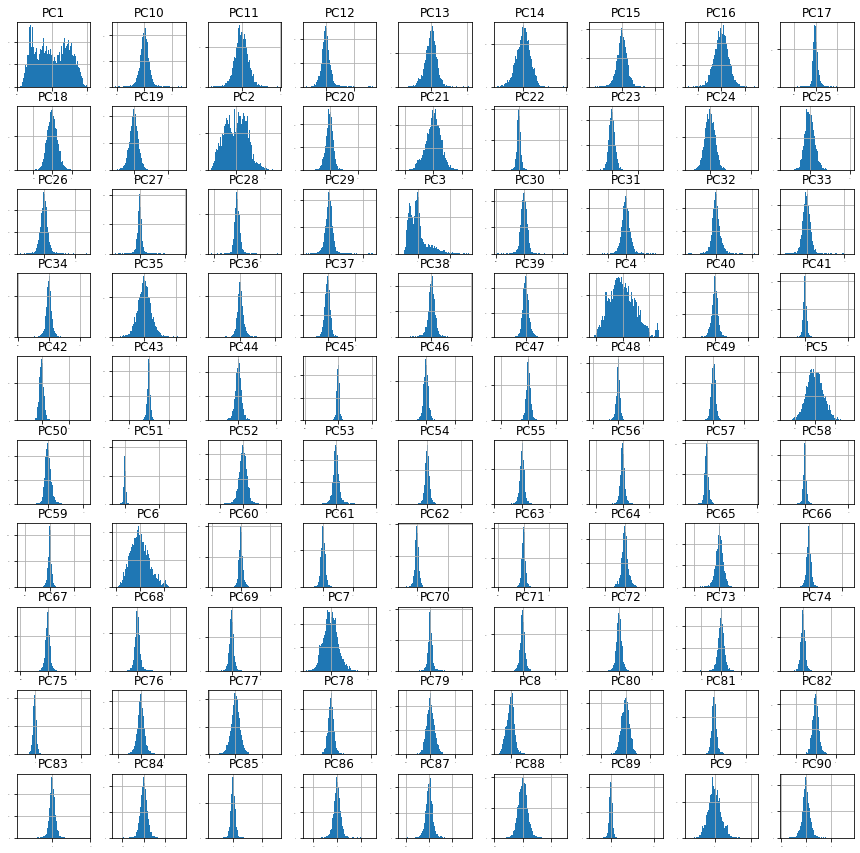

In [81]:
fig, axes = plt.subplots(figsize=(15, 15))
pca1.hist(bins=100, xlabelsize=0.5, ylabelsize=0.5, ax=axes)
plt.show()

**Checking Correlation Among PCA if Exists**

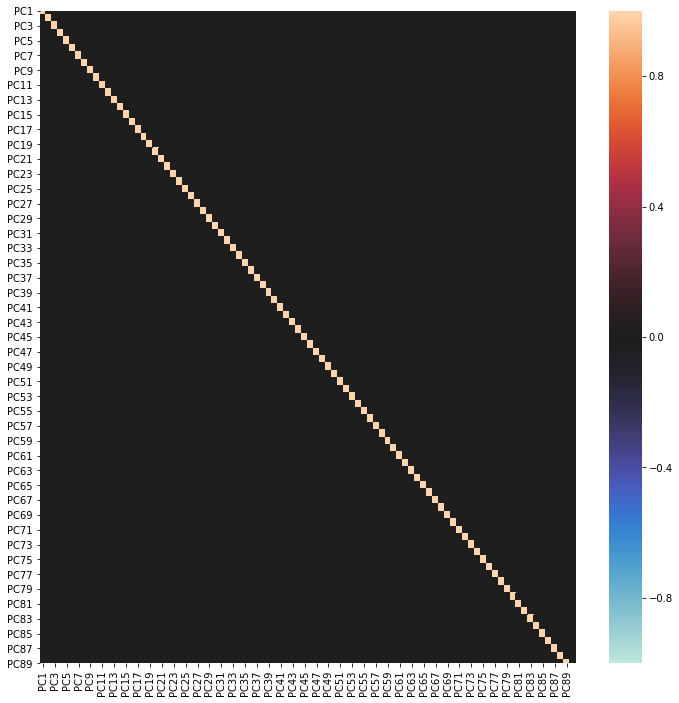

In [82]:
corr = pca1.corr()
fig, axes = plt.subplots(figsize=(12, 12))
graph = sns.heatmap(corr, vmin=-1, vmax=1, center=0, ax=axes)
plt.show()

**Hence Proved There does not exist any Correlation among PCA so we will use this PCAs as Feature of training for Clustering.**

In [83]:
df1 = df.join(pca1)

In [84]:
df1.head()

,HCM2,main,CONTROL,st_fips,LOCALE,LATITUDE,LONGITUDE,HBCU,PBI,ANNHI,...,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90
0,0,1,1,1,12.0,34.7834,-86.5685,1.0,0.0,0.0,...,-0.079963,-0.870330,0.552210,-0.773702,0.455416,-0.901348,-0.599093,-0.271101,-0.279592,0.882053
1,0,1,1,1,12.0,33.5022,-86.8092,0.0,0.0,0.0,...,0.374119,-0.608333,1.309025,0.264625,0.773897,-0.368081,-0.871177,0.606976,-0.515901,-1.416335
2,0,1,2,1,12.0,32.3626,-86.1740,0.0,0.0,0.0,...,0.795545,0.397125,1.338938,1.095101,-0.190067,-1.452212,-0.170018,0.211325,0.268279,-0.076718
3,0,1,1,1,12.0,34.7228,-86.6384,0.0,0.0,0.0,...,-0.034896,0.860013,-0.427936,-0.401075,0.956798,0.731772,-1.629246,-0.644775,-0.702838,-0.533480
4,0,1,1,1,12.0,32.3643,-86.2957,1.0,0.0,0.0,...,-0.493109,0.359586,0.226730,-1.182790,0.951315,0.355256,-0.175394,-0.462472,-0.250960,0.203866


# Principal Component Analysis

**Top 5 Feature / Column Names of princial Component 1 contributing highest Variance**

In [85]:
pd.DataFrame(Components.T.sort_values("PCA 1", axis=0, ascending=False).iloc[:, 0]).head()

,PCA 1
RPY_3YR_RT_SUPP,0.1934
PELL_RPY_3YR_RT_SUPP,0.1933
RPY_3YR_RT,0.1927
LO_INC_RPY_3YR_RT_SUPP,0.1924
FIRSTGEN_RPY_3YR_RT_SUPP,0.1905


**Top 5 Feature / Column Names  of princial Component 2 contributing highest Variance**

In [86]:
pd.DataFrame(Components.T.sort_values("PCA 2", axis=0, ascending=False).iloc[:, 1]).head()

,PCA 2
CIP54BACHL,0.1419
CIP15BACHL,0.1217
UGDS,0.1195
CIP52ASSOC,0.1184
CIP14BACHL,0.1133


**Top 5 Feature / Column Names  of princial Component 3 contributing highest Variance**

In [87]:
pd.DataFrame(Components.T.sort_values("PCA 3", axis=0, ascending=False).iloc[:, 2]).head()

,PCA 3
CIP48ASSOC,0.2274
CIP01ASSOC,0.1982
CIP52ASSOC,0.1878
CIP14ASSOC,0.1873
PCIP24,0.1817


## 7) Spherical  Kmean Clustering for Cosine Distance Method :

**Apply Spherical Clustering for Cosine Distance Method.**

In [88]:
from spherecluster import SphericalKMeans
skm = SphericalKMeans(n_clusters=3)
model = skm.fit(pca1)

labels = model.predict(pca1)
score = np.abs(model.score(pca1))
centroids = model.cluster_centers_

In [89]:
from mpl_toolkits.mplot3d import Axes3D

def plot_data(data, labels):
    '''
    Plot data with colors associated with labels
    '''
    fig = plt.figure(figsize=(10, 8));
    ax = Axes3D(fig)
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='tab10');

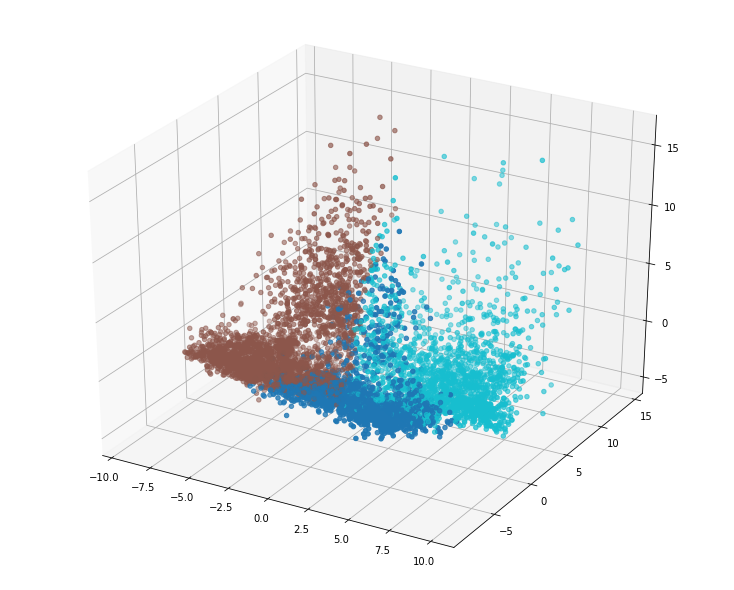

In [90]:
plot_data(X_pca, labels)

## Analyze Cluster  Labels on DataSet:

In [91]:
df["Label"] = labels

**Showing Clustering Category in each Row in DataSet**

In [92]:
df.head(100)

,HCM2,main,CONTROL,st_fips,LOCALE,LATITUDE,LONGITUDE,HBCU,PBI,ANNHI,...,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Label
0,0,1,1,1,12.0,34.7834,-86.5685,1.0,0.0,0.0,...,654,405,851,870,115,759,475,494,444,2
1,0,1,1,1,12.0,33.5022,-86.8092,0.0,0.0,0.0,...,2015,1811,2377,2496,1368,2258,1847,2063,1898,2
2,0,1,2,1,12.0,32.3626,-86.1740,0.0,0.0,0.0,...,1690,3184,1850,1764,1241,1379,1555,1437,1313,0
3,0,1,1,1,12.0,34.7228,-86.6384,0.0,0.0,0.0,...,2060,1992,2487,2528,1762,2306,2059,2212,2045,2
4,0,1,1,1,12.0,32.3643,-86.2957,1.0,0.0,0.0,...,459,164,384,337,52,327,204,212,208,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,1,2,4,41.0,33.6072,-111.8465,0.0,0.0,0.0,...,3277,3184,3267,3596,2888,3597,2930,3170,3273,0
99,0,1,1,4,21.0,33.5675,-112.1883,0.0,0.0,0.0,...,1401,1003,1146,1143,707,1150,949,1119,976,1
100,0,1,3,4,11.0,33.5122,-112.1299,0.0,0.0,0.0,...,691,555,534,375,266,459,385,412,460,1
101,0,1,3,4,11.0,33.4943,-112.0502,0.0,0.0,0.0,...,652,711,1049,1048,566,875,783,802,721,1


In [93]:
column_lst = df.columns[df.columns != 'Label']

In [ ]:
fig, axes = plt.subplots(9, 4, figsize=(20, 50))
vars = column_lst
GraphY = 0
GraphX = 0
for i in range(9):
    for j in range(i+1, 9):
        GraphY = GraphY % 4
        GraphX = GraphX % 9
        sns.scatterplot(x=vars[i], y=vars[j], data=df, hue="Label", ax=axes[GraphX, GraphY])
        GraphX += 1
        GraphY +=1